#### Cache Augmented Generation

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain.chat_models import init_chat_model
from langchain_openai import OpenAIEmbeddings

embedding_model=OpenAIEmbeddings(model='text-embedding-3-small')
llm=init_chat_model('openai:gpt-4o-mini')

In [4]:
model_cache={}

In [13]:
import time

def cache_model(query):
    start_time=time.time()
    if model_cache.get(query):
        print("**CACHE HIT!!!")
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        return model_cache.get(query)
    else:
        print("**CACHE MISS - EXECUTING MODEL**")
        start_time=time.time()
        response=llm.invoke(query)
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        model_cache[query]=response
        return response

In [6]:
response=cache_model('hi')
response

**CACHE MISS - EXECUTING MODEL**
EXECUTION TIME: 1.22 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CF2oqzJxGSuUeQbQVd5CbsnlEFPeu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--637aa0e5-ca00-46a0-9e24-124fb55a7f68-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
model_cache

{'hi': AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CF2oqzJxGSuUeQbQVd5CbsnlEFPeu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--637aa0e5-ca00-46a0-9e24-124fb55a7f68-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [10]:
response=cache_model('hi')
response

** Cache hit
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CF2oqzJxGSuUeQbQVd5CbsnlEFPeu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--637aa0e5-ca00-46a0-9e24-124fb55a7f68-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
response=cache_model('write about attention mechanism about 50 words')
response

**CACHE MISS - EXECUTING MODEL**
EXECUTION TIME: 2.38 seconds


AIMessage(content='The attention mechanism, a pivotal concept in machine learning, particularly in natural language processing, enables models to focus on relevant parts of the input data when generating outputs. By weighing the importance of different input elements, it enhances context understanding, improving tasks like translation and summarization, making models more efficient and accurate.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 15, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CF2rSWHGk8EhrbubQ8h58pQHxBX61', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d078ffd-2f52-48f0-9c41-955243d97ae2-0', usage_m

In [12]:
response=cache_model('write about attention mechanism about 50 words')
response

** Cache hit
EXECUTION TIME: 0.00 seconds


AIMessage(content='The attention mechanism, a pivotal concept in machine learning, particularly in natural language processing, enables models to focus on relevant parts of the input data when generating outputs. By weighing the importance of different input elements, it enhances context understanding, improving tasks like translation and summarization, making models more efficient and accurate.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 15, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CF2rSWHGk8EhrbubQ8h58pQHxBX61', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2d078ffd-2f52-48f0-9c41-955243d97ae2-0', usage_m

#### Advanced CAG

In [8]:
from __future__ import annotations
from typing import TypedDict,List,Optional
import time

from langgraph.graph import StateGraph,END
from langgraph.checkpoint.memory import MemorySaver


from langchain_core.documents import Document
from langchain_openai import ChatOpenAI,OpenAIEmbeddings
import faiss
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [22]:
EMBED_MODEL="text-embedding-3-small"

LLM_MODEL='gpt-4o-mini'
LLM_TEMPERATURE=0

RETRIEVE_TOP_K=4
CACHE_TOP_K=3


CACHE_TTL_SEC=0
CACHE_DISTANCE_THRESHOLD=0.45

In [23]:
class RAGState(TypedDict):
    question:str
    normalized_question:str
    context_docs=List[Document]
    answer:Optional[str]
    citations:List[str]
    cache_hit:bool

In [24]:
EMBED=OpenAIEmbeddings(model=EMBED_MODEL)

In [43]:
DIM = len(EMBED.embed_query("test"))
qa_index=faiss.IndexFlatL2(DIM)
QA_CACHE=FAISS(
    embedding_function=EMBED,
    index=qa_index,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)

In [44]:
QA_CACHE

In [45]:
RAG_STORE=FAISS.from_texts(
    texts=[
        'Langgraph lets you compose stateful LLM workflows as graphs.',
        'In Langgraph,nodes can be cache;node caching memoizes outputs keyed by inputs for a TTl',
        'Retrieval-Augmented Generation (RAG) retrieves external context and injects it into prompts',
        'Semantic caching reuses prior answers when new questions are semantically similar'
    ],
    embedding=EMBED
)

In [46]:
LLM=ChatOpenAI(model=LLM_MODEL)

In [47]:
def normalize_query(state:RAGState) -> RAGState:
    q=(state['question'] or "").strip()
    state['normalized_question']=q.lower()
    return state

In [48]:
def semantic_cache_lookup(state:RAGState) -> RAGState:
    q=state['normalized_question']
    state['cache_hit']=False

    if not q:
        return state
    
    if getattr(QA_CACHE,'index',None) is None or QA_CACHE.index.ntotal==0:
        return state
    
    hits=QA_CACHE.similarity_search_with_score(q,k=CACHE_TOP_K)
    if not hits:
        return state
    best_docs,dist=hits[0]

    if CACHE_TTL_SEC >0:
        ts=best_docs.metadata.get('ts')
        if ts is None or (time.time() - float(ts)) > CACHE_TTL_SEC:
            return state
    
    if dist <= CACHE_DISTANCE_THRESHOLD:
        cached_answer=best_docs.metadata.get('answer')
        if cached_answer:
            state['answer']=cached_answer
            state['citations']=['(cache)']
            state['cache_hit']=True
    return state

In [49]:
def respond_from_cache(state:RAGState) -> RAGState:
    return state

In [50]:
def retrieve(state:RAGState) -> RAGState:
    q=state['normalized_question']
    docs=RAG_STORE.similarity_search(q,k=RETRIEVE_TOP_K)
    state['context_docs']=docs
    return state

In [51]:
def generate(state:RAGState) -> RAGState:
    q=state['question']
    docs=state.get('context_docs',[])
    ctx="\n\n".join([f"[doc-{i}] {d.page_content}" for i,d in enumerate(docs,start=1)])

    system=(
        "You are a precise RAG assistant.Use the context when helpful."
        "cite with [doc-i] markers if you use a fact from the context."
    )
    user=f"question:{q}\n\nContext:\n{ctx}\n\nWrite a concise answer with citations."
    resp=LLM.invoke([
        {"role":"system","content":system},
        {"role":"user","content":user}
    ])
    state['answer']=resp.content
    state['citations']=[f"[doc-{i}]" for i in range(1,len(docs)+1)]
    return state

In [52]:
def cache_write(state:RAGState) -> RAGState:
    q=state['normalized_question']
    a=state.get('answer')
    if not q or not a:
        return state
    
    QA_CACHE.add_texts(
        texts=[q],
        metadatas=[{
            'answer':a,
            'ts':time.time()
        }]
    )
    return state

In [53]:
graph=StateGraph(RAGState)

graph.add_node('normalize_query',normalize_query)
graph.add_node('semantic_cache_lookup',semantic_cache_lookup)
graph.add_node('respond_from_cache',respond_from_cache)
graph.add_node('retrieve',retrieve)
graph.add_node('generate',generate)
graph.add_node('cache_write',cache_write)

graph.set_entry_point('normalize_query')
graph.add_edge('normalize_query','semantic_cache_lookup')

def _branch(state:RAGState) -> str:
    return "respond_from_cache" if state.get('cache_hit') else 'retrieve'

graph.add_conditional_edges(
    'semantic_cache_lookup',
    _branch,
    {
        'respond_from_cache':'respond_from_cache',
        'retrieve':'retrieve'
    }
)
graph.add_edge('respond_from_cache',END)
graph.add_edge('retrieve','generate')
graph.add_edge('generate','cache_write')
graph.add_edge('cache_write',END)
    

memory=MemorySaver()
app=graph.compile(checkpointer=memory)

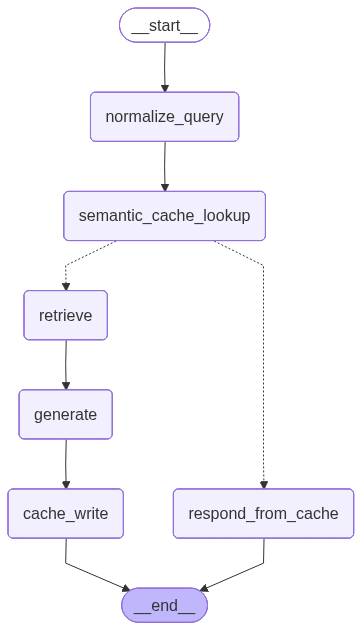

In [54]:
app

In [55]:
if __name__=="__main__":
    thread_cfg={'configurable':{'thread_id':'demo-user-1'}}

    q1='what is langgraph?'
    out1=app.invoke({'question':q1,'context_docs':[],'citations':[]},thread_cfg)

    print("Answer",out1['answer'])
    print('citations',out1.get('citations'))
    print('cache hit?',out1.get('cache_hit'))

Answer LangGraph is a platform designed for developers to build and deploy powerful applications using Natural Language Processing (NLP) and Machine Learning (ML) technologies. It simplifies the integration of language understanding and generation capabilities into software solutions, making it easier for users to leverage advanced algorithms and datasets for various applications, such as chatbots, content generation, and more. 

For further details, you might want to refer back to the specific documentation or source for in-depth information [doc-i].
citations []
cache hit? False


In [57]:
q1='Please Explain about Langgraph?'
out1=app.invoke({'question':q1,'context_docs':[],'citations':[]},thread_cfg)

print("Answer",out1['answer'])
print('citations',out1.get('citations'))
print('cache hit?',out1.get('cache_hit'))

Answer LangGraph is a platform designed for developers to build and deploy powerful applications using Natural Language Processing (NLP) and Machine Learning (ML) technologies. It simplifies the integration of language understanding and generation capabilities into software solutions, making it easier for users to leverage advanced algorithms and datasets for various applications, such as chatbots, content generation, and more. 

For further details, you might want to refer back to the specific documentation or source for in-depth information [doc-i].
citations ['(cache)']
cache hit? True
